In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pystan
import scipy
import math

from pylab import plot,show,hist,figure,title

In [3]:
df = pd.read_excel("/Users/ishanichakraborty/Google Drive/userVisits.xlsx")
df.head()

,user_id,total_visits,weeklyVisits,Interval_visits_int
0,1332384,70,"0,0,0,1,2,1,1,0,0,2,1,0,0,2,1,0,0,0,1,1,2,1,0,...","[3, 0, 0, 0, 2, 0, 2, 0, 3, 0, 0, 0, 1, 4, 2, ..."
1,1332636,4,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","[62, 12, 1, 28]"
2,1334543,4,"1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","[6, 0]"
3,1336195,1,"0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",[113]
4,1339702,16,"1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...","[110, 14, 29, 7, 29, 2, 2, 1, 0, 2, 4, 1, 1, 1..."


In [4]:
#df = df.iloc[df.index <= 200]

In [9]:
df = df.loc[df.total_visits > 70]

In [10]:
visits = df['weeklyVisits'].tolist()

In [21]:
visits_int = list(list((int(a)* int(a)* int(a)) for a in (str(r).split(',')))for r in visits)

In [22]:
len(visits_int)

210

In [23]:
len(visits_int[10])

113

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 62., 40., 43.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

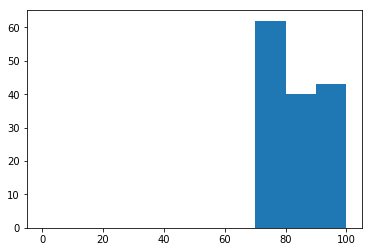

In [24]:
hist(df['total_visits'], range =[0,100])

In [36]:
visitsg_code = """
data {
    int<lower=0> J;// number of users
    int<lower=0> G;// number of groups
    int<lower=0> M;// number of months ;;; actually weeks
    //int<lower=0> K[G];// number of users in a group
    int y[J,M]; // estimated number of visits next week
    //real<lower=0> sigma[J]; // s.e. of visits estimates
}
parameters {
    //real mu;
    real<lower=0,upper=1> tau[G,J];
    
    real<lower=0> eta[J];
    real <lower=0, upper=200> Petag1[G];
    real <lower=0, upper=200> Petag2[G];
    
    //real sigma;
}
transformed parameters {
     //real <lower=0> theta[J];
     //real <lower =0> K[G];
     real <lower =0, upper =1> alpha[G,J];
     real<lower=0> gCon1[J];
     real<lower=0> gCon2[J];
     real <lower=0,upper=1> count;
     
     for(j in 1:J){
     gCon1[j]=0;
     gCon2[j]=0;
     }
     count = 0;
     for (j in 1:J){
     for ( g in 1:G){
     alpha[g,j] = tau[g,j];
     count = count + alpha[g,j];
     }
     for(g in 1:G){
     alpha[g,j]=alpha[g,j]/count;
     
     }
     count =0;
     }
     
     
     
     for (g in 1:G){
     
     for (j in 1:J){
     gCon1[j]= gCon1[j] + etag1[g]*alpha[g,j];
     gCon2[j]= gCon2[j] + etag2[g]*alpha[g,j];
     }
     }
     
     
     

}
model {
    
    for(g in 1:G){
    
    for (j in 1:J){
    tau[g,j] ~ beta (2,2);
    }
    }

    
    for(j in 1:J){
    eta[j] ~ gamma(gCon1[j],gCon2[j]);
    }
    for (j in 1:J){
    for(m in 1:M){
    y[j,m] ~ poisson(eta[j]);
    }
 }
}
"""



visitsg_dat = {'J': len(visits_int),
              'M':113,
              'G':10,
              
              'y': visits_int
               }



sm = pystan.StanModel(model_code=visitsg_code)
fit = sm.sampling(data=visitsg_dat, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_bbd888da3d5d373595f36998c3a27733 NOW.


In [37]:
fit


Inference for Stan model: anon_model_bbd888da3d5d373595f36998c3a27733.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
tau[0,0]       0.48  3.8e-3   0.17   0.16   0.37   0.46   0.58   0.86   2000   1.02
tau[1,0]       0.52  5.0e-3   0.22    0.1   0.35   0.53   0.69   0.91   2000    1.0
tau[2,0]       0.52  4.9e-3   0.22   0.11   0.35   0.52   0.68   0.91   2000    1.0
tau[3,0]       0.51  5.0e-3   0.22    0.1   0.34   0.52   0.69   0.91   2000    1.0
tau[4,0]       0.51  4.8e-3   0.22    0.1   0.35   0.52   0.68   0.91   2000    1.0
tau[5,0]       0.51  5.1e-3   0.23   0.08   0.34   0.51   0.69   0.92   2000    1.0
tau[6,0]       0.51  5.0e-3   0.22   0.11   0.34   0.52   0.69   0.92   2000    1.0
tau[7,0]       0.51  5.0e-3   0.22    0.1   0.34   0.52   0.69   0.92   2000    1.0
tau[8,0]       0.47  3.9e-3   0.17   0.16   0.36   0.45  

In [ ]:
fit.